## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
#spam_data = pd.read_csv("spambase.csv")
spam_data = pd.read_csv("/Users/aprilsong/Documents/data_science/DAT_SF_12/Homework/spambase.csv")
spam_data.head()
# spam_data.describe()
#spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_data.describe().T.sort('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
capital_run_length_total,4601,283.289285,606.347851,1,35.000,95.000,266.000,15841.000
capital_run_length_longest,4601,52.172789,194.891310,1,6.000,15.000,43.000,9989.000
capital_run_length_average,4601,5.191515,31.729449,1,1.588,2.276,3.706,1102.500
word_freq_you,4601,1.662100,1.775481,0,0.000,1.310,2.640,18.750
word_freq_your,4601,0.809761,1.200810,0,0.000,0.220,1.270,11.110
word_freq_george,4601,0.767305,3.367292,0,0.000,0.000,0.000,33.330
word_freq_hp,4601,0.549504,1.671349,0,0.000,0.000,0.000,20.830
word_freq_will,4601,0.541702,0.861698,0,0.000,0.100,0.800,9.670
is_spam,4601,0.394045,0.488698,0,0.000,0.000,1.000,1.000
word_freq_our,4601,0.312223,0.672513,0,0.000,0.000,0.380,10.000


In [4]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


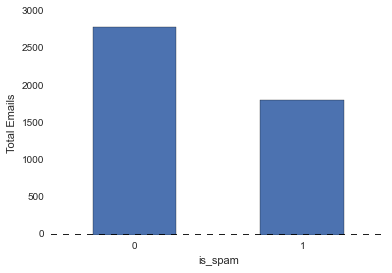

In [5]:
spam_data.groupby('is_spam').is_spam.count().plot(kind='bar', rot=0)
plt.xlabel('is_spam')
plt.ylabel('Total Emails')
 

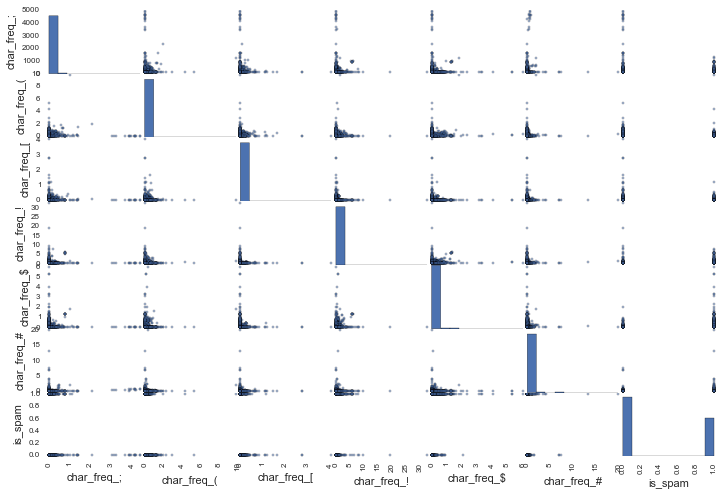

In [6]:
_ = pd.scatter_matrix(spam_data[['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#','is_spam']], figsize=(12,8))

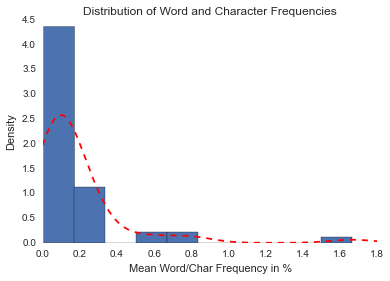

In [7]:
spam_data.loc[:, 'word_freq_make':'char_freq_#'].mean().hist(normed=True), 'by'==0
plt.title('Distribution of Word and Character Frequencies')
plt.xlabel('Mean Word/Char Frequency in %')
spam_data.loc[:, 'word_freq_make':'char_freq_#'].mean().plot(kind='kde', xlim=(0, 1.8), style='r--')

In [8]:
spam_data_wfreq = spam_data.loc[:, 'word_freq_make':'word_freq_conference']
spam_data_wfreq['is_spam'] = spam_data['is_spam']

spam_data_cfreq = spam_data.loc[:, 'char_freq_;':'char_freq_#']
spam_data_cfreq['is_spam'] = spam_data['is_spam']

spam_data_cap = spam_data.loc[:, 'capital_run_length_average':'capital_run_length_total']
spam_data_cap['is_spam'] = spam_data['is_spam']


In [388]:
corr_df = spam_data.corr()
corr_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0

In [10]:
top_words_0 = spam_data_wfreq.groupby('is_spam').mean().transpose().sort(columns=0, ascending=False).head(10).iloc[:,0:1]
top_words_0


is_spam,0
word_freq_you,1.270341
word_freq_george,1.265265
word_freq_hp,0.895473
word_freq_will,0.536324
word_freq_your,0.438702
word_freq_hpl,0.431994
word_freq_re,0.415760
word_freq_edu,0.287184
word_freq_address,0.244466
word_freq_meeting,0.216808


In [11]:
spam_data[spam_data['is_spam']==0][top_words_0.index.values].corr()


,word_freq_you,word_freq_george,word_freq_hp,word_freq_will,word_freq_your,word_freq_hpl,word_freq_re,word_freq_edu,word_freq_address,word_freq_meeting
word_freq_you,1.000000,-0.135216,-0.163812,-0.015426,0.266575,-0.126580,0.180481,0.045247,-0.063669,-0.064417
word_freq_george,-0.135216,1.000000,-0.058998,-0.135417,-0.085764,-0.033559,-0.034191,-0.068139,-0.037069,-0.031378
word_freq_hp,-0.163812,-0.058998,1.000000,-0.021202,-0.083524,0.485704,0.014403,-0.087892,-0.053586,-0.016349
word_freq_will,-0.015426,-0.135417,-0.021202,1.000000,0.051731,0.015986,-0.089503,-0.080372,-0.060301,0.128009
word_freq_your,0.266575,-0.085764,-0.083524,0.051731,1.000000,-0.068760,0.011418,-0.030436,-0.028003,-0.043062
word_freq_hpl,-0.126580,-0.033559,0.485704,0.015986,-0.068760,1.000000,-0.042627,-0.074792,-0.047026,0.027322
word_freq_re,0.180481,-0.034191,0.014403,-0.089503,0.011418,-0.042627,1.000000,0.024356,-0.019861,-0.011956
word_freq_edu,0.045247,-0.068139,-0.087892,-0.080372,-0.030436,-0.074792,0.024356,1.000000,-0.028636,-0.040618
word_freq_address,-0.063669,-0.037069,-0.053586,-0.060301,-0.028003,-0.047026,-0.019861,-0.028636,1.000000,-0.029899
word_freq_meeting,-0.064417,-0.031378,-0.016349,0.128009,-0.043062,0.027322,-0.011956,-0.040618,-0.029899,1.000000


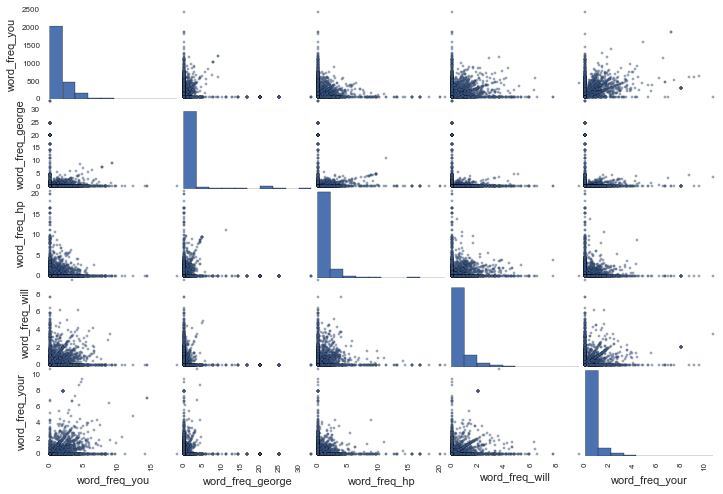

In [12]:
# scatter matrix of the top 5 mean word frequency for non-spam emails
_ = pd.scatter_matrix(spam_data[spam_data['is_spam']==0][top_words_0.index.values[:5]], figsize=(12,8))

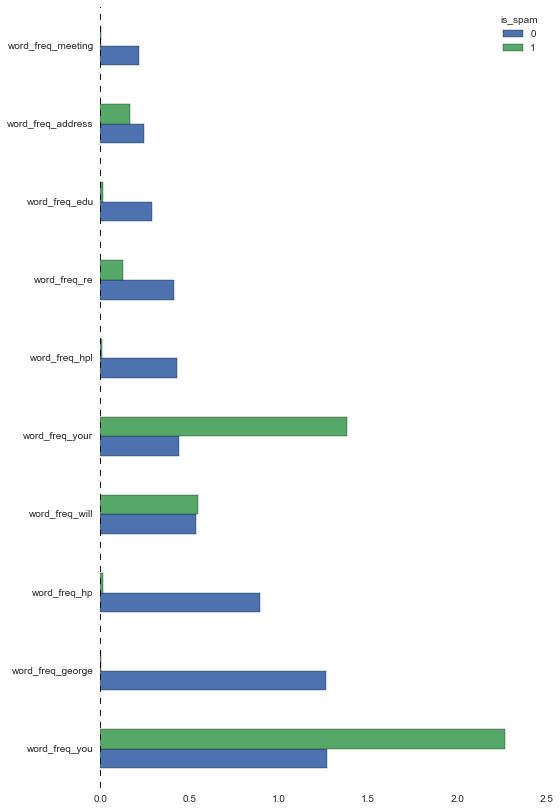

In [13]:
cols_0 = top_words_0.index.insert(10, 'is_spam')
df_0 = spam_data[cols_0]
df_0.groupby('is_spam').mean().transpose().plot(kind='barh', figsize=(8,14))


In [15]:
top_words_1 = spam_data_wfreq.groupby('is_spam').mean().transpose().sort(columns=0, ascending=False).head(10).iloc[:,1:2]
top_words_1

is_spam,1
word_freq_you,2.264539
word_freq_george,0.001550
word_freq_hp,0.017479
word_freq_will,0.549972
word_freq_your,1.380370
word_freq_hpl,0.009173
word_freq_re,0.125091
word_freq_edu,0.014727
word_freq_address,0.164650
word_freq_meeting,0.002443


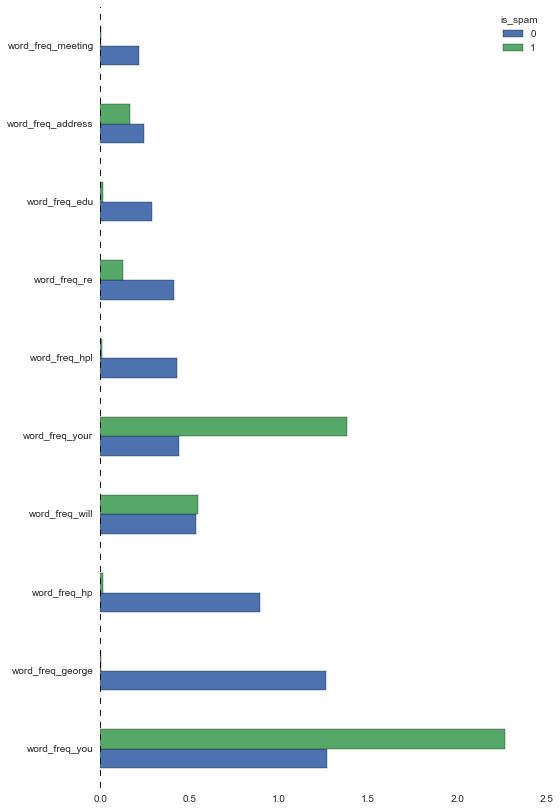

In [16]:
cols_1 = top_words_1.index.insert(10, 'is_spam')
df_1 = spam_data[cols_1]
df_1.groupby('is_spam').mean().transpose().plot(kind='barh', figsize=(8,14))


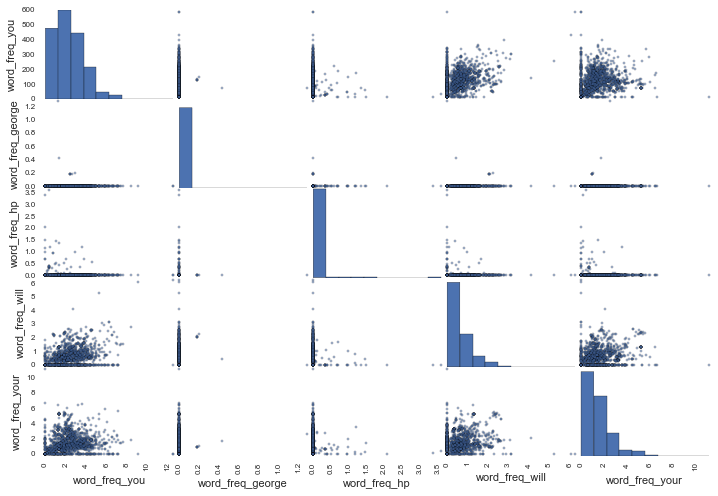

In [17]:
# scatter matrix of the top 5 mean word frequency for spam emails
_ = pd.scatter_matrix(spam_data[spam_data['is_spam']==1][top_words_1.index.values[:5]], figsize=(12,8))

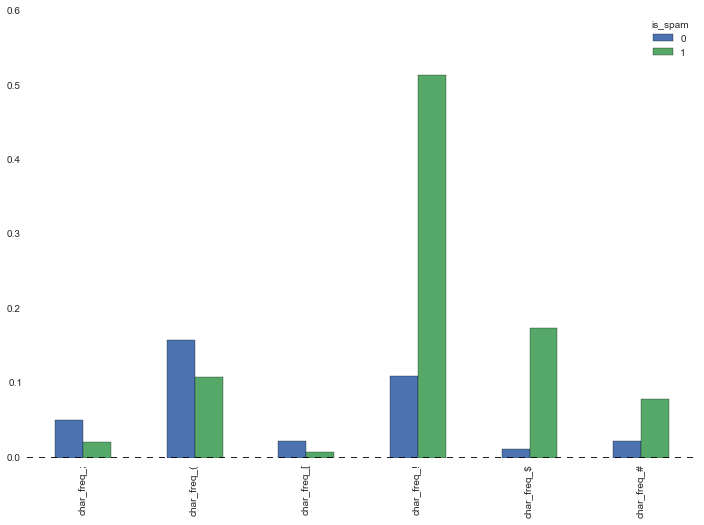

In [19]:
spam_data_cfreq.groupby('is_spam').mean().transpose().plot(kind='bar', figsize=(12,8))


In [20]:
top_chars_0 = spam_data_cfreq.groupby('is_spam').mean().transpose().sort(columns=1, ascending=False).head(10).iloc[:,0:1]
top_chars_0

is_spam,0
char_freq_!,0.109984
char_freq_$,0.011648
char_freq_(,0.158578
char_freq_#,0.021713
char_freq_;,0.050281
char_freq_[,0.022684


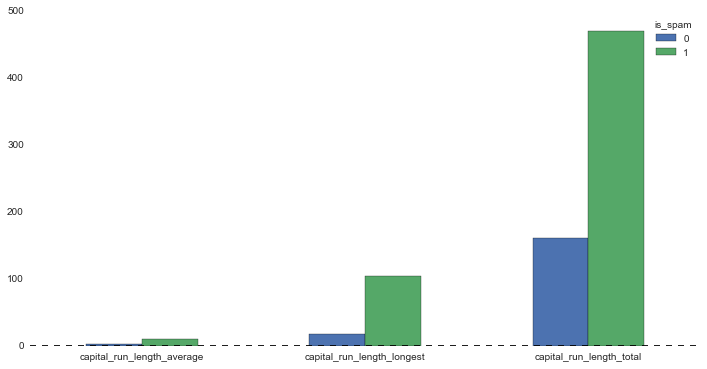

In [21]:
spam_data_cap.groupby('is_spam').mean().transpose().plot(kind='bar', rot=0, figsize=(12, 6))


In [22]:
spam_data.iloc[:, 48:58].corr().loc['capital_run_length_average':'capital_run_length_total', 'char_freq_;':'char_freq_#']

,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
capital_run_length_average,0.003443,0.034365,-0.008180,0.054308,0.079998,0.013497
capital_run_length_longest,0.040829,0.370963,-0.013994,0.077392,0.183144,0.061657
capital_run_length_total,0.055298,0.112209,0.006016,0.036321,0.201948,0.042568


###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

log_model = smf.logit("is_spam ~ capital_run_length_longest", data=spam_data).fit()
print log_model.params
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8
Intercept                    -1.253055
capital_run_length_longest    0.025223
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4599
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                  0.1604
Time:                        16:43:51   Log-Likelihood:                -2590.2
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                3.003e-217
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.2531      0.046    -27.416      0.000        -1.343    -1.163
capital_run_length_longest     0.0252      0.001     21.189      0.000         0.023     0.028
==============================================================================================
"""

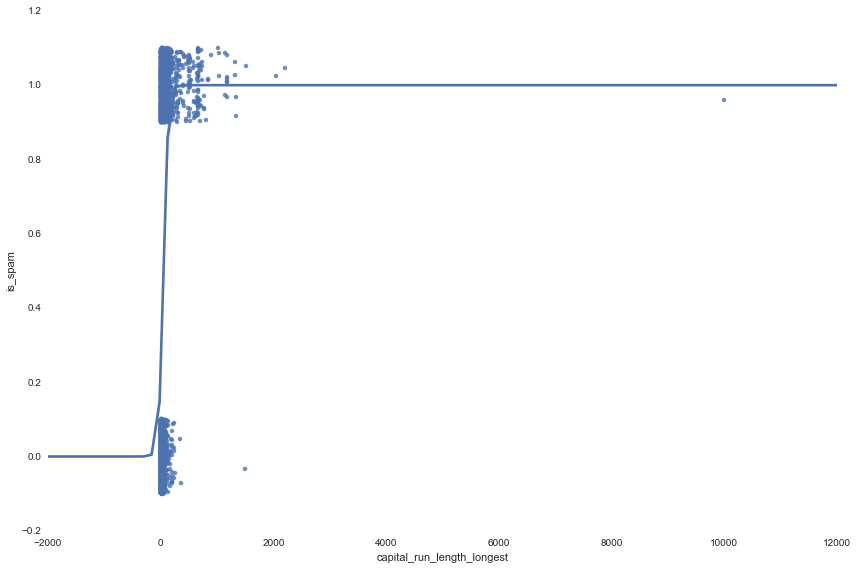

In [24]:
sns.lmplot("capital_run_length_longest", "is_spam", spam_data, logistic=True, size=8, aspect=1.5, y_jitter=.1);

In [25]:
# remove outliers in capital_run_length_longest
spam_data = spam_data[np.abs(spam_data.capital_run_length_longest-spam_data.capital_run_length_longest.mean())<=(3*spam_data.capital_run_length_longest.std())]

log_model = smf.logit("is_spam ~ capital_run_length_longest", data=spam_data).fit()
print log_model.params
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.563059
         Iterations 7
Intercept                    -1.307946
capital_run_length_longest    0.027401
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4533
Model:                          Logit   Df Residuals:                     4531
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                  0.1553
Time:                        16:44:28   Log-Likelihood:                -2552.3
converged:                       True   LL-Null:                       -3021.4
                                        LLR p-value:                4.946e-206
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.3079      0.047    -28.074      0.000        -1.399    -1.217
capital_run_length_longest     0.0274      0.001     21.908      0.000         0.025     0.030
==============================================================================================
"""

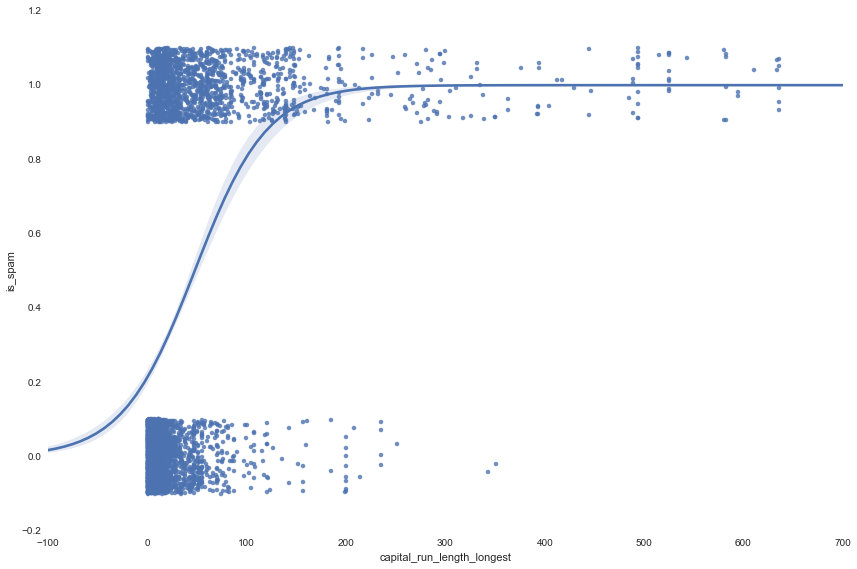

In [26]:
sns.lmplot("capital_run_length_longest", "is_spam", spam_data, logistic=True, size=8, aspect=1.5, y_jitter=.1);

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model 

X = spam_data.loc[:,'word_freq_make':'capital_run_length_total']
y = spam_data['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

log_model = linear_model.LogisticRegression(random_state=12)
log_model.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=12, tol=0.0001)

In [50]:
predicted = log_model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 1, 1])

In [51]:
probas_ = log_model.predict_proba(X_test)
pd.DataFrame(probas_).head()


,0,1
0,1.000000,2.949632e-27
1,1.000000,3.889851e-11
2,0.999976,2.392624e-05
3,0.685428,3.145722e-01
4,0.950324,4.967640e-02


In [54]:
probas_ = log_model.predict_proba(X_test)
pd.DataFrame(probas_).head()

,0,1
0,1.000000,9.329065e-22
1,1.000000,7.076194e-10
2,0.999941,5.915213e-05
3,0.545899,4.541012e-01
4,0.874574,1.254256e-01


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [55]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(log_model, X, y, cv=5)
print "5-fold cross validation scores:"
print scores
print
print "Mean Score: %f" % scores.mean()


5-fold cross validation scores:
[ 0.92070485  0.9261301   0.93267108  0.94591611  0.83554084]

Mean Score: 0.912193


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [57]:
from sklearn import neighbors

k = 3
knn_clf = neighbors.KNeighborsClassifier(k, weights='uniform')
knn_clf.fit(X_train, y_train)

scores_knn = cross_val_score(knn_clf, X, y, cv=5)
print "5-fold cross validation scores for KNN:"
print scores_knn
print
print "Mean Score: %f" % scores_knn.mean()


5-fold cross validation scores for KNN:
[ 0.77312775  0.77728776  0.8200883   0.8013245   0.69426049]

Mean Score: 0.773218


The logistic regression model is more accurate with a mean score of .911 vs .773 for the KNN model. (outliers not removed)

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [59]:
feature_coef = pd.DataFrame(zip(X.columns.values[:57], np.transpose(log_model.coef_)), columns=['Features', 'Coefficient'])
feature_coef.sort('Coefficient', ascending=False).T

,22,6,23,52,51,16,4,13,35,15,19,21,7,14,2,20,9,8,27,5,48,54,10,37,29,49,39,31,17,55,56,33,46,38,3,53,18,12,11,1,42,0,50,28,30,40,47,34,44,25,32,45,43,41,24,36,26
Features,word_freq_000,word_freq_remove,word_freq_money,char_freq_$,char_freq_!,word_freq_business,word_freq_our,word_freq_report,word_freq_technology,word_freq_free,word_freq_credit,word_freq_font,word_freq_internet,word_freq_addresses,word_freq_all,word_freq_your,word_freq_mail,word_freq_order,word_freq_650,word_freq_over,char_freq_;,capital_run_length_average,word_freq_receive,word_freq_parts,word_freq_labs,char_freq_(,word_freq_direct,word_freq_857,word_freq_email,capital_run_length_longest,capital_run_length_total,word_freq_415,word_freq_table,word_freq_pm,word_freq_3d,char_freq_#,word_freq_you,word_freq_people,word_freq_will,word_freq_address,word_freq_original,word_freq_make,char_freq_[,word_freq_lab,word_freq_telnet,word_freq_cs,word_freq_conference,word_freq_85,word_freq_re,word_freq_hpl,word_freq_data,word_freq_edu,word_freq_project,word_freq_meeting,word_freq_hp,word_freq_1999,word_freq_george
Coefficient,[2.31543061059],[2.08005616026],[2.06634758143],[2.01541869223],[1.96895077537],[1.48369261336],[1.47873445099],[1.44782559999],[1.21397742764],[1.20709726985],[1.02326933201],[0.843113553104],[0.755250522836],[0.581247882174],[0.553390186703],[0.508880470963],[0.495850069647],[0.494369258266],[0.486536614958],[0.478949073503],[0.327975463224],[0.277177399048],[0.276837441207],[0.158777431619],[0.110553627897],[0.0914902454578],[0.070371462541],[0.0663123439605],[0.0429700791427],[0.00342177348271],[0.000865492358337],[-0.0567719174176],[-0.0652225785868],[-0.111905413354],[-0.127576118176],[-0.135228375809],[-0.147919496492],[-0.275944362314],[-0.30653325999],[-0.356907386141],[-0.365998074634],[-0.468770175728],[-0.492062383274],[-0.621899207191],[-0.622743066299],[-0.760552840645],[-0.778963509685],[-0.828476431273],[-0.833843027639],[-1.03288844955],[-1.12776757094],[-1.13161908556],[-1.42252914136],[-1.43361678454],[-1.54754278805],[-1.55556848803],[-2.30764497975]


In [60]:
feature_coef.sort('Coefficient').T

,26,36,24,41,43,45,32,25,44,34,47,40,30,28,50,0,42,1,11,12,18,53,3,38,46,33,56,55,17,31,39,49,29,37,10,54,48,5,27,8,9,20,2,14,7,21,19,15,35,13,4,16,51,52,23,6,22
Features,word_freq_george,word_freq_1999,word_freq_hp,word_freq_meeting,word_freq_project,word_freq_edu,word_freq_data,word_freq_hpl,word_freq_re,word_freq_85,word_freq_conference,word_freq_cs,word_freq_telnet,word_freq_lab,char_freq_[,word_freq_make,word_freq_original,word_freq_address,word_freq_will,word_freq_people,word_freq_you,char_freq_#,word_freq_3d,word_freq_pm,word_freq_table,word_freq_415,capital_run_length_total,capital_run_length_longest,word_freq_email,word_freq_857,word_freq_direct,char_freq_(,word_freq_labs,word_freq_parts,word_freq_receive,capital_run_length_average,char_freq_;,word_freq_over,word_freq_650,word_freq_order,word_freq_mail,word_freq_your,word_freq_all,word_freq_addresses,word_freq_internet,word_freq_font,word_freq_credit,word_freq_free,word_freq_technology,word_freq_report,word_freq_our,word_freq_business,char_freq_!,char_freq_$,word_freq_money,word_freq_remove,word_freq_000
Coefficient,[-2.30764497975],[-1.55556848803],[-1.54754278805],[-1.43361678454],[-1.42252914136],[-1.13161908556],[-1.12776757094],[-1.03288844955],[-0.833843027639],[-0.828476431273],[-0.778963509685],[-0.760552840645],[-0.622743066299],[-0.621899207191],[-0.492062383274],[-0.468770175728],[-0.365998074634],[-0.356907386141],[-0.30653325999],[-0.275944362314],[-0.147919496492],[-0.135228375809],[-0.127576118176],[-0.111905413354],[-0.0652225785868],[-0.0567719174176],[0.000865492358337],[0.00342177348271],[0.0429700791427],[0.0663123439605],[0.070371462541],[0.0914902454578],[0.110553627897],[0.158777431619],[0.276837441207],[0.277177399048],[0.327975463224],[0.478949073503],[0.486536614958],[0.494369258266],[0.495850069647],[0.508880470963],[0.553390186703],[0.581247882174],[0.755250522836],[0.843113553104],[1.02326933201],[1.20709726985],[1.21397742764],[1.44782559999],[1.47873445099],[1.48369261336],[1.96895077537],[2.01541869223],[2.06634758143],[2.08005616026],[2.31543061059]


Most influential features with positive coefficients are char_freq_$, word_freq_remove, word_freq_000, word_freq_credit, word_freq_technology, and word_freq_over. This means that increases in the frequency for these words correspond to an increase in likelihood of the email being spam.

Most influential features with negative coefficients are word_freq_george, word_freq_hp, word_freq_meeting,	word_freq_edu, word_freq_project, word_freq_conference, word_freq_cs, char_freq_;, and word_freq_lab. This means that increases in the frequency for these words correspond to an decrease in likelihood of the email being spam. 

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [61]:

def plot_roc_curve(target_test, target_predicted_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    


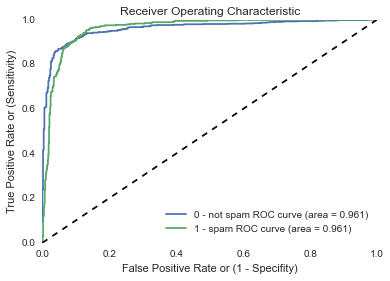

In [62]:
from sklearn.metrics import roc_curve, auc
probas_ = log_model.predict_proba(X_test)
categories = ['0 - not spam','1 - spam']

plot_roc_curve(y_test, probas_, categories)


### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [77]:
df = pd.DataFrame(probas_)
df['y_test'] = y_test # Actual y values
df['y_50'] = predicted # predicted values if threshold = 0.5 (default)


# predicted values if threshold = 0.35 (default)
df['y_35'] = df[df.columns.values[1]].apply(lambda x: 1 if x > 0.35 else 0) 
# predicted values if threshold = 0.45 (default)
df['y_45'] = df[df.columns.values[1]].apply(lambda x: 1 if x > 0.45 else 0) 
# predicted values if threshold = 0.65 (default)
df['y_65'] = df[df.columns.values[1]].apply(lambda x: 1 if x > 0.65 else 0) 
# predicted values if threshold = 0.75 (default)
df['y_75'] = df[df.columns.values[1]].apply(lambda x: 1 if x > 0.75 else 0) 

df.head()

,0,1,y_test,y_50,y_35,y_45,y_65,y_75
0,1.000000,9.329065e-22,0,0,0,0,0,0
1,1.000000,7.076194e-10,0,0,0,0,0,0
2,0.999941,5.915213e-05,0,0,0,0,0,0
3,0.545899,4.541012e-01,0,0,1,1,0,0
4,0.874574,1.254256e-01,0,0,0,0,0,0


Accuracy Score (threshold = .35): 0.902941
Accuracy Score (threshold = .45): 0.902941
Accuracy Score (threshold = .50): 0.925000
Accuracy Score (threshold = .65): 0.908824
Accuracy Score (threshold = .75): 0.904412


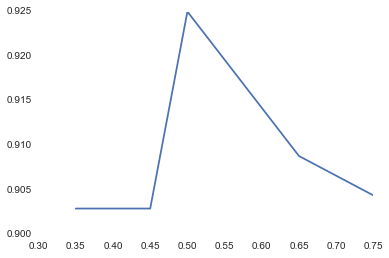

In [65]:
from sklearn import metrics

y_35 = df['y_35'].values
y_45 = df['y_45'].values
y_65 = df['y_65'].values
y_75 = df['y_75'].values

a_35 = metrics.accuracy_score(y_test, y_35)
a_45 = metrics.accuracy_score(y_test, y_45)
a_50 = metrics.accuracy_score(y_test, predicted)
a_65 = metrics.accuracy_score(y_test, y_65)
a_75 = metrics.accuracy_score(y_test, y_75)

print 'Accuracy Score (threshold = .35): %f' % a_35
print 'Accuracy Score (threshold = .45): %f' % a_45
print 'Accuracy Score (threshold = .50): %f' % a_50
print 'Accuracy Score (threshold = .65): %f' % a_65
print 'Accuracy Score (threshold = .75): %f' % a_75

plt.plot([.35, .45, .50, .65, .75], [a_35, a_45, a_50, a_65, a_75]);

In [66]:
from sklearn.metrics import classification_report
print classification_report(y_test, predicted, target_names=categories)
predicted

              precision    recall  f1-score   support

0 - not spam       0.93      0.95      0.94       854
    1 - spam       0.91      0.89      0.90       506

 avg / total       0.92      0.93      0.92      1360



array([0, 0, 0, ..., 0, 1, 1])

In [407]:
from sklearn.metrics import confusion_matrix

print 'Threshold = 0.35'
print pd.DataFrame(confusion_matrix(y_test, y_35),
             index = pd.MultiIndex.from_product([['actual'], categories]),
             columns = pd.MultiIndex.from_product([['predicted'], categories]))
print
print 'Threshold = 0.45'
print pd.DataFrame(confusion_matrix(y_test, y_45),
             index = pd.MultiIndex.from_product([['actual'], categories]),
             columns = pd.MultiIndex.from_product([['predicted'], categories]))
print
print 'Threshold = 0.50'
print pd.DataFrame(confusion_matrix(y_test, predicted),
             index = pd.MultiIndex.from_product([['actual'], categories]),
             columns = pd.MultiIndex.from_product([['predicted'], categories]))
print
print 'Threshold = 0.65'
print pd.DataFrame(confusion_matrix(y_test, y_65),
             index = pd.MultiIndex.from_product([['actual'], categories]),
             columns = pd.MultiIndex.from_product([['predicted'], categories]))
print
print 'Threshold = 0.75'
print pd.DataFrame(confusion_matrix(y_test, y_75),
             index = pd.MultiIndex.from_product([['actual'], categories]),
             columns = pd.MultiIndex.from_product([['predicted'], categories]))


Threshold = 0.35
                       predicted         
                    0 - not spam 1 - spam
actual 0 - not spam          785       69
       1 - spam               37      469

Threshold = 0.45
                       predicted         
                    0 - not spam 1 - spam
actual 0 - not spam          797       57
       1 - spam               49      457

Threshold = 0.50
                       predicted         
                    0 - not spam 1 - spam
actual 0 - not spam          809       45
       1 - spam               56      450

Threshold = 0.65
                       predicted         
                    0 - not spam 1 - spam
actual 0 - not spam          821       33
       1 - spam               86      420

Threshold = 0.75
                       predicted         
                    0 - not spam 1 - spam
actual 0 - not spam          826       28
       1 - spam              115      391


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

A high threshold  can give us few false positive predictions but lots of false negatives. From above, we see that when threshold=0.65 we get 33 false positives and 86 false negatives. When threshold=0.75, we get 28 false positives and 115 false negatives. 

A low threshold can give us few false negative predictions but lots of false negatives. From above, we see that when threshold=0.45 we get 49 false negatives and 57 false positives. When threshold=0.35, we get 37 false negatives and 69 false positives. 

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)

In [68]:
pca.fit(spam_data.iloc[:,:57])

PCA(copy=True, n_components=2, whiten=True)

In [69]:
pca.components_

array([[  8.35628953e-08,  -9.96475133e-08,   8.49375929e-08,
          1.05046818e-07,  -1.90420428e-08,   4.76024490e-08,
         -1.68226306e-08,   4.87412761e-08,   1.97370179e-07,
          1.56712262e-07,   7.15120056e-08,   6.98768482e-08,
          9.80592957e-08,   1.91794823e-07,   5.27925900e-08,
          2.52281456e-08,   1.00925956e-07,   4.52375656e-08,
         -2.43834748e-08,   1.27092729e-07,   2.10663499e-07,
          2.87509423e-07,   1.59874217e-07,   1.10706486e-07,
         -1.94486707e-07,  -1.55676153e-07,  -1.06725064e-06,
         -1.15035917e-07,  -1.07545902e-07,  -9.24832347e-08,
         -5.79193626e-08,  -4.89564300e-08,   2.56058288e-08,
         -4.71963864e-08,  -7.46128732e-08,  -5.50631990e-08,
          1.02675780e-08,  -9.27502599e-09,  -6.74544077e-08,
         -3.47420794e-08,  -2.85975255e-08,  -1.38070093e-07,
         -3.14078831e-08,  -8.15661787e-08,  -3.14153559e-07,
         -1.31817831e-07,   2.06809080e-09,  -6.27017704e-09,
        

In [70]:
pca.explained_variance_ratio_

array([ 0.98714753,  0.0126426 ])

In [71]:
pca.explained_variance_ratio_.sum()

0.99979013275003703

In [72]:
X_pca = pca.transform(spam_data.iloc[:,:57])

In [73]:
np.round(X_pca.mean(axis=0), decimals=5)
np.round(X_pca.std(axis=0), decimals=5)

np.corrcoef(X_pca.T)


array([[  1.00000000e+00,  -6.29003921e-16],
       [ -6.29003921e-16,   1.00000000e+00]])

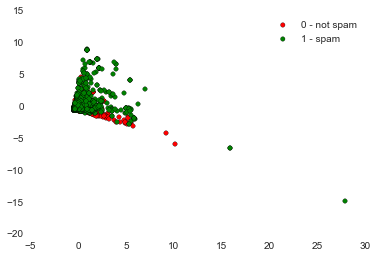

In [74]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

plot_PCA_2D(X_pca, spam_data['is_spam'].values, categories)